## Imports

In [14]:
import matplotlib.pyplot as plt
import numpy as np

from push_t_env import PushTImageEnv

## Visualize the environment
Show the observations from the environment.

Observation space keys:  dict_keys(['image', 'agent_pos'])
Observation space for image has shape (3, 96, 96), dtype float32, and range [0.0, 1.0]
Observation space for agent_pos has shape (2,), dtype float64, and range [0.0, 512.0]


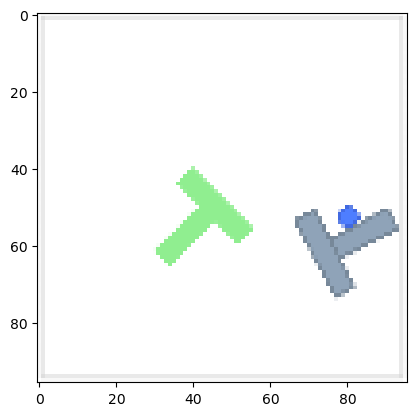

In [28]:
env = PushTImageEnv()
# get first observation
obs = env.reset()
# render the environment
imgs = [env.render(mode='rgb_array')]
print("Observation space keys: ", obs.keys())
for modality in obs.keys():
    print(f"Observation space for {modality} has shape {obs[modality].shape}, dtype {obs[modality].dtype}, and range [{np.min(env.observation_space[modality].low)}, {np.max(env.observation_space[modality].high)}]")
# Show the first observation
plt.imshow(imgs[0])
plt.show()

## Interact with the environment
Want to show how we can give actions, and what observations we get back.

In [32]:
# show the info for actions
print(f"Action space for the environment has shape {env.action_space.shape}, type {env.action_space.dtype}, and ranges from {env.action_space.low} to {env.action_space.high}")

Action space for the environment has shape (2,), type float64, and ranges from [0. 0.] to [512. 512.]


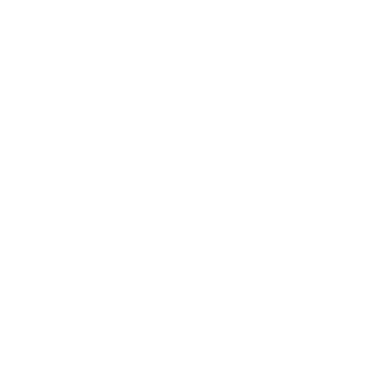

In [41]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation

max_time_steps = 100
act_high, act_low = env.action_space.high, env.action_space.low
imgs = []
for timestep in range(max_time_steps):
    action = np.random.rand(2) * (act_high - act_low) + act_low
    next_state, reward, done, info = env.step(action)
    imgs.append(env.render(mode='rgb_array'))
    if done:
        break

# Plot the images as an animation
fig = plt.figure()
plt.axis("off")
ims = [[plt.imshow(img, animated=True)] for img in imgs]
ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
HTML(ani.to_jshtml())
